# Analysing differences in spatial distribution of alphas

want to look at Fe for now and ant PBE vs. RSCAN and Spin vs No-Spin.

In [475]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import pickle
from scipy import stats
from mpl_toolkits import mplot3d
import seaborn as sns
sns.set()
import math

In [476]:
def plot_heat_triple(alpha_slice_1,alpha_slice_2,labels=['A','B'],set_label='',
                    vmin=None,vmax=None,vmin_diff=None,vmax_diff=None):
    diff_slice = alpha_slice_1 - alpha_slice_2
    fix, axs = plt.subplots(ncols=4,figsize=(20,5))
    sns.heatmap(data = alpha_slice_1, ax=axs[0], vmin=vmin, vmax=vmax).set_title(
            labels[0]+': '+set_label)
    sns.heatmap(data = alpha_slice_2, ax=axs[1], vmin=vmin, vmax=vmax).set_title(
            labels[1]+': '+set_label)
    sns.heatmap(data = diff_slice, ax=axs[2], vmin=vmin_diff, vmax=vmax_diff
            ).set_title('Difference')
    sns.heatmap(data = abs(diff_slice), ax=axs[3], vmin=vmin_diff, vmax=vmax_diff
            ).set_title('Difference,abs')

In [477]:
# load spin data structure 
with open('./ferro_mag_extreme/data.obj','rb') as myfile:
     spin = pickle.load(myfile)
spin.pop('NiO',None)
pass

In [462]:
# load spin_pbe data structure 
with open('./ferro_magnetic_PBE/data.obj','rb') as myfile:
     spin_pbe = pickle.load(myfile)

In [463]:
# load no-spin data
with open('./non_spin_magnetic/data.obj','rb') as myfile:
     no_spin = pickle.load(myfile)

In [464]:
# Modified Slightly
# turn tripple nested dictionary into pandas data frame
def gen_df_from_dict_new(mag_dict_big):   
    mag_big_df = pd.DataFrame.from_dict({(i,j): mag_dict_big[i][j][0] 
                               for i in mag_dict_big.keys()
                               for j in mag_dict_big[i].keys()},
                               orient='index')
    # turn tuple columns into multiindex
    mag_big_df.index = pd.MultiIndex.from_tuples(mag_big_df.index)
    mag_big_df = mag_big_df.transpose()
    return mag_big_df

In [465]:
# add no_spin alphas to dictionary
# loop only over intersect
for element in (set(spin.keys()).intersection(no_spin.keys())):
    spin[element]['no_spin']=no_spin[element]['alpha_1']
    for i in range(1,4):
        spin[element]['alpha_'+str(i)+'_pbe']=spin_pbe[element]['alpha_'+str(i)]

In [484]:
# turn dictionary into dataFrame
alpha = gen_df_from_dict_new(spin)


UsageError: Line magic function `%memit` not found.


In [467]:
alpha.head()

Co                                                                    \
    alpha_3   alpha_2   alpha_1   no_spin alpha_1_pbe alpha_2_pbe alpha_3_pbe   
0  0.345099  0.306909  0.373544  0.345998    0.371121    0.315408    0.346824   
1  0.350024  0.311867  0.378373  0.350730    0.376052    0.320419    0.351818   
2  0.364699  0.326722  0.392710  0.364980    0.390688    0.335444    0.366707   
3  0.388841  0.351445  0.416114  0.388733    0.414582    0.360445    0.391214   
4  0.421895  0.385876  0.447778  0.421841    0.446915    0.395266    0.424793   

         Cu                      ...          Fe                          \
    alpha_3   alpha_2   alpha_1  ... alpha_1_pbe alpha_2_pbe alpha_3_pbe   
0  0.344239  0.344239  0.344239  ...    0.410340    0.281277    0.356327   
1  0.349997  0.349997  0.349997  ...    0.413514    0.285687    0.360118   
2  0.367372  0.367372  0.367372  ...    0.423179    0.298783    0.371414   
3  0.396448  0.396448  0.396448  ...    0.439730    0.319803    0.389947   
4  0.436760  0.436760  0.436760  ...    0.463385    0.347350    0.415212   

         Ni                                                                    
    alpha_3   alpha_2   alpha_1   no_spin alpha_1_pbe alpha_2_pbe alpha_3_pbe  
0  0.344759  0.337373  0.351289  0.345089    0.350379    0.339240    0.345096  
1  0.350495  0.343095  0.357031  0.350796    0.356275    0.345114    0.350984  
2  0.367697  0.360329  0.374186  0.367914    0.373881    0.362745    0.368608  
3  0.396234  0.389125  0.402453  0.396305    0.402876    0.392089    0.397782  
4  0.435639  0.429358  0.441067  0.435496    0.442454    0.432860    0.437946  

[5 rows x 28 columns]

# Spin v.s No_Spin heat maps of 2D slices
## Fe

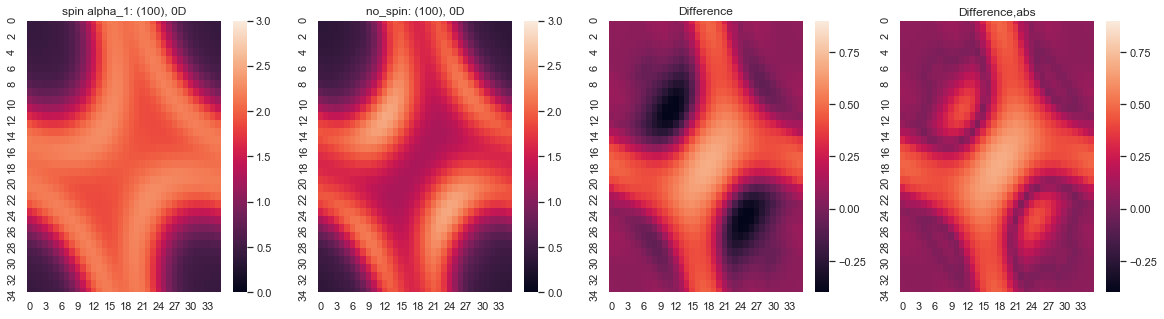

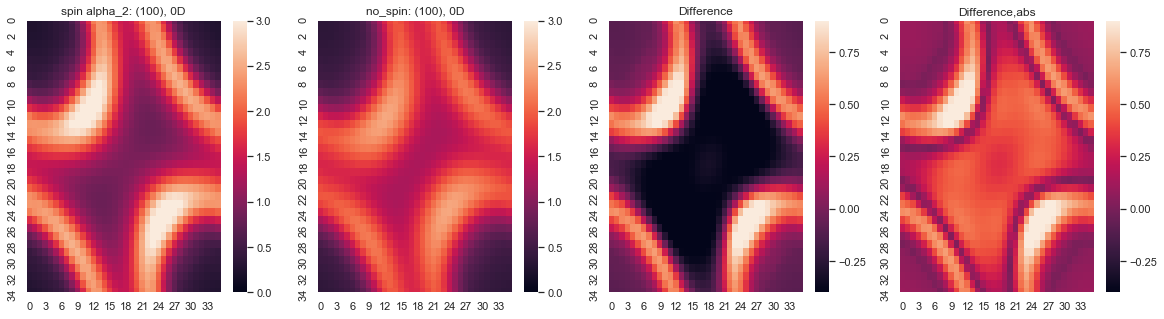

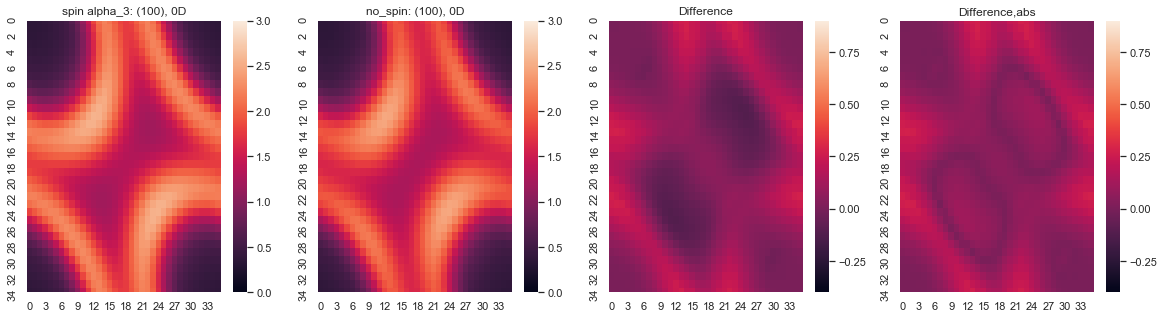

In [473]:
# slice (1,0,0) , Od
for i in range(1,4):
    alpha_slice_1 = spin['Fe']['alpha_'+str(i)][1][0,:,:]
    alpha_slice_2 = no_spin['Fe']['alpha_1'][1][0,:,:]

    plot_heat_triple(alpha_slice_1,alpha_slice_2,labels=['spin alpha_'+str(i),'no_spin'],
                 set_label='(100), 0D',vmin=0,vmax=3,vmin_diff=-0.4,vmax_diff=0.9)


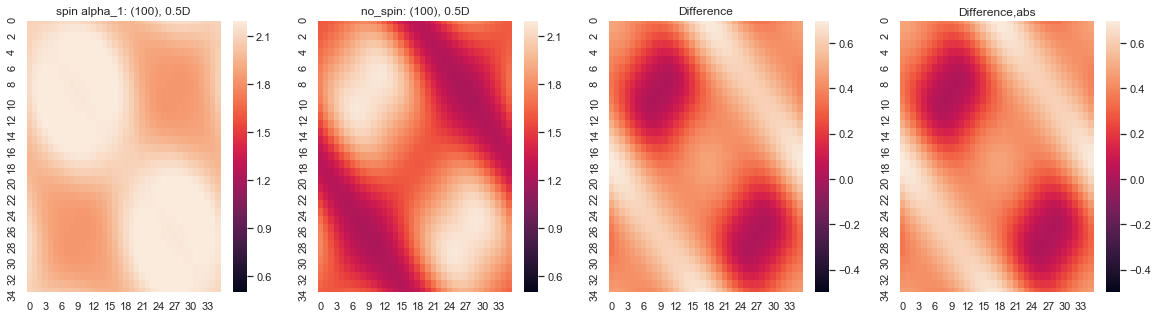

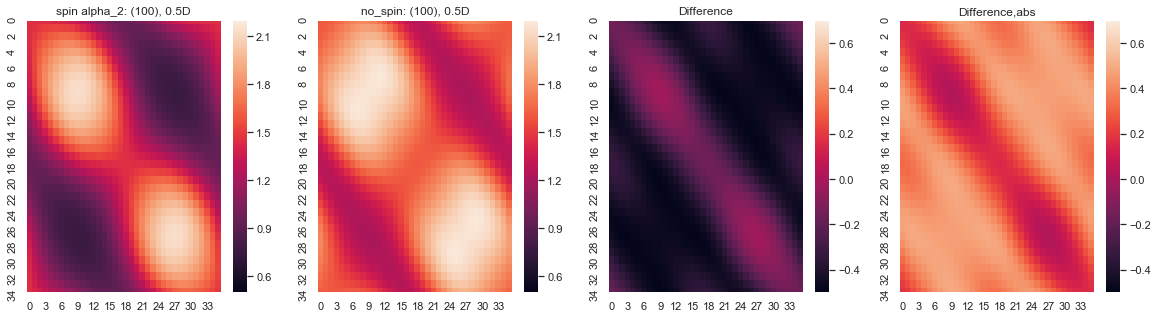

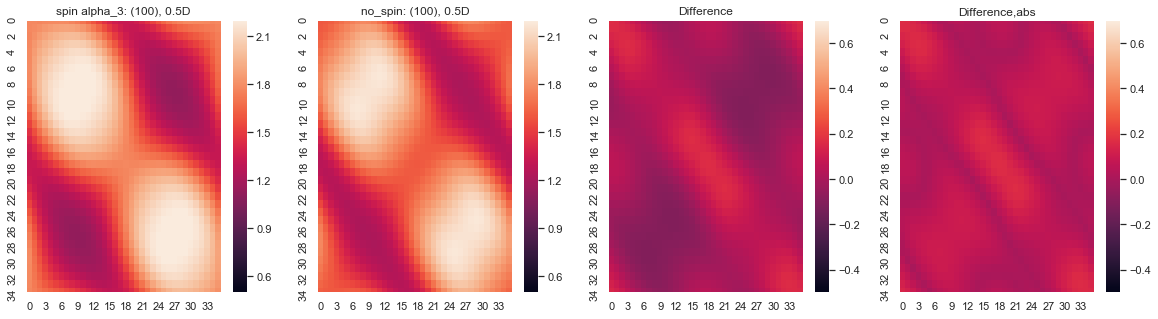

In [478]:
# slice (1,0,0) , 0.5d
for i in range(1,4):
    alpha_slice_1 = spin['Fe']['alpha_'+str(i)][1][18,:,:]
    alpha_slice_2 = no_spin['Fe']['alpha_1'][1][18,:,:]

    plot_heat_triple(alpha_slice_1,alpha_slice_2,labels=['spin alpha_'+str(i),'no_spin'],
                 set_label='(100), 0.5D',vmin=0.5,vmax=2.2, vmin_diff=-0.5,vmax_diff=0.7)

#vmin=0,vmax=3, vmin_diff=-0.4,vmax_diff=0.9

## RSCAN vs PBE Fe Slices

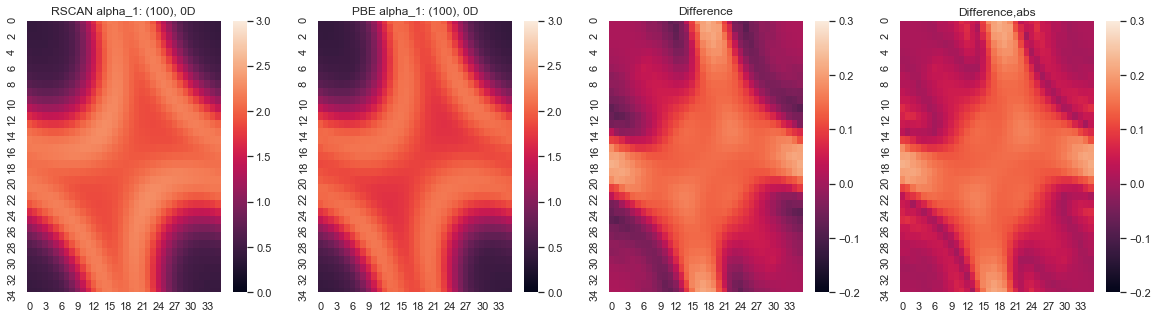

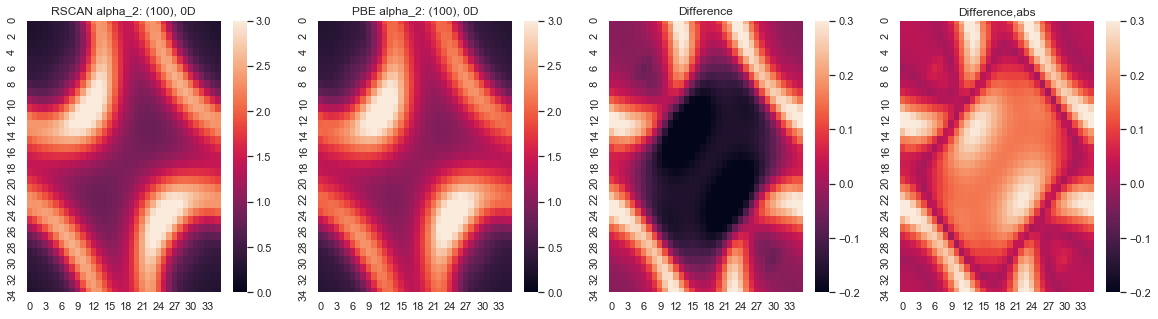

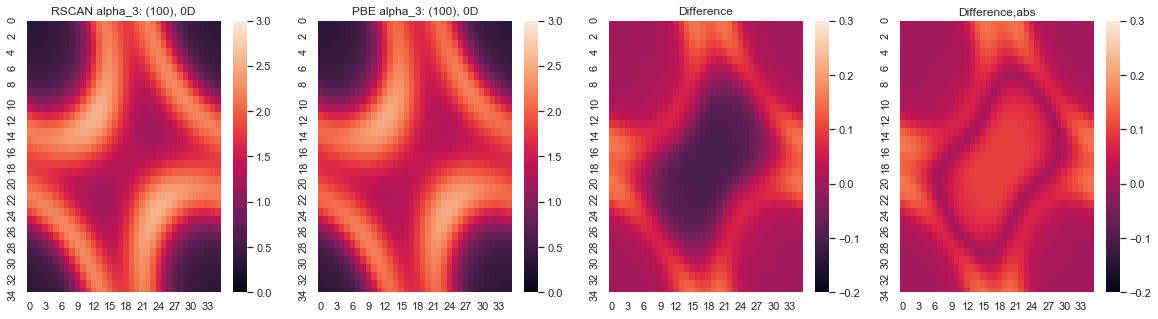

In [479]:
# slice (1,0,0) , Od
for i in range(1,4):
    alpha_slice_1 = spin['Fe']['alpha_'+str(i)][1][0,:,:]
    alpha_slice_2 = spin_pbe['Fe']['alpha_'+str(i)][1][0,:,:]

    plot_heat_triple(alpha_slice_1,alpha_slice_2,labels=['RSCAN alpha_'+str(i),
                'PBE alpha_'+str(i)], set_label='(100), 0D',
                 vmin=0,vmax=3,vmin_diff=-0.2,vmax_diff=0.3)



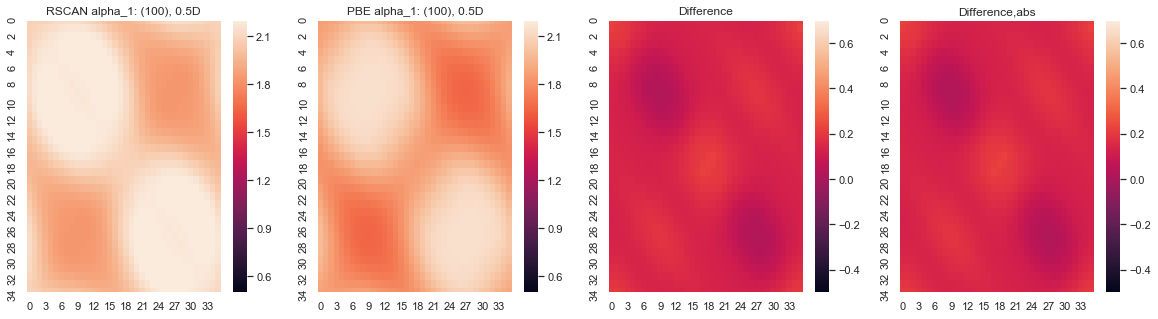

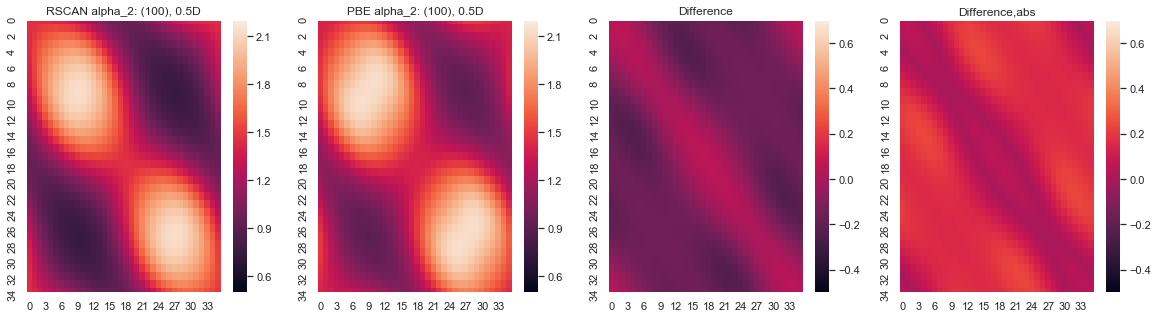

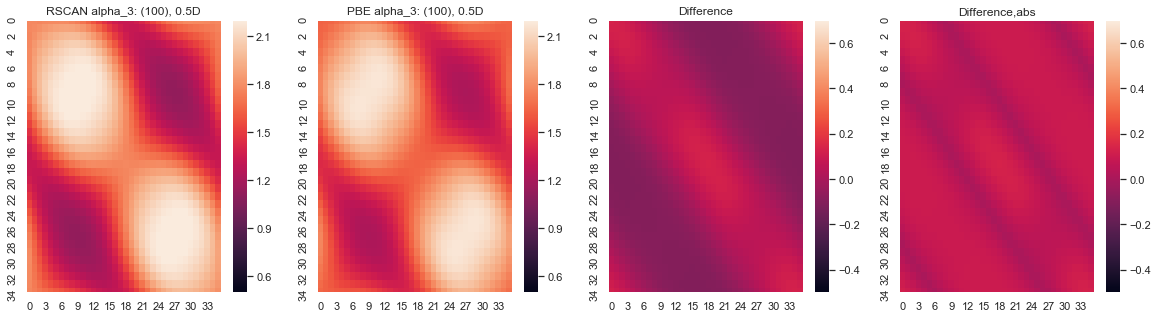

In [480]:
# slice (1,0,0) , Od
for i in range(1,4):
    alpha_slice_1 = spin['Fe']['alpha_'+str(i)][1][18,:,:]
    alpha_slice_2 = spin_pbe['Fe']['alpha_'+str(i)][1][18,:,:]

    plot_heat_triple(alpha_slice_1,alpha_slice_2,labels=['RSCAN alpha_'+str(i),
                'PBE alpha_'+str(i)], set_label='(100), 0.5D',
                 vmin=0.5,vmax=2.2, vmin_diff=-0.5,vmax_diff=0.7)




## Can i get a diagonal to work?

In [425]:
diag_2d = np.zeros([36,36])
count =0 
for i in range(0,36):
    for j in range(0,36):
        if i==j:
            diag_2d[:,i]= spin['Fe']['alpha_2'][1][:,i,j]


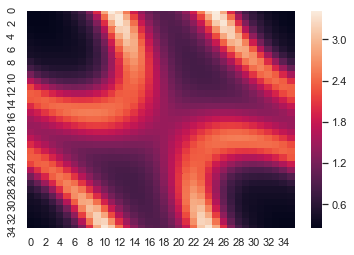

In [426]:
sns.heatmap(diag_2d)

In [433]:
x = np.linspace(1, 37, 36)
y = np.linspace(1, 53, 36)
my_interpolating_function = RegularGridInterpolator((x, y), diag_2d)

In [434]:
my_interpolating_function([1,1])

array([0.25032049])

In [435]:
point_list = []
for i in np.linspace(1, 52, 52):
    for j in np.linspace(1, 37, 36):
        point_list.append([i,j])

values = my_interpolating_function(point_list)



ValueError: One of the requested xi is out of bounds in dimension 0

In [430]:
values_matrix = values.reshape([52,36])

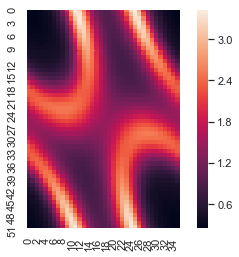

In [432]:
sns.heatmap(values_matrix,square=True)